In [62]:
import requests

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [72]:
url = 'https://github.com/fivethirtyeight/data/blob/master/alcohol-consumption/drinks.csv?raw=true'
df = pd.read_csv(url,index_col=0)
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9


In [81]:
print('Download Starting ...')
url = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
r = requests.get(url)
filename = url.split('/')[-1]
 
with open(filename,'wb') as output_file:
    output_file.write(r.content)
 
print('Download Completed!!!')

Download Starting ...
Download Completed!!!


In [121]:
path = 'C:/Users/QXJ/IBM/drinks.csv'
df = pd.read_csv(path)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [75]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [76]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [77]:
df.describe(include = 'all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193,193.000000,193.000000,193.000000,193.000000
unique,193,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,106.160622,80.994819,49.450777,4.717098
std,NaN,101.143103,88.284312,79.697598,3.773298
min,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,20.000000,4.000000,1.000000,1.300000
50%,NaN,76.000000,56.000000,8.000000,4.200000
75%,NaN,188.000000,128.000000,59.000000,7.200000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [122]:
url = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
df_2 = pd.read_csv(url)
df_2.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [123]:
df_2.rename(columns={"Country":"country"},inplace = True)
df_2.head()

,Continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [125]:
df_2.dtypes

Continent    object
country      object
dtype: object

In [128]:
# join continent to the drink list
drink = pd.merge(df, df_2, how = 'left', on= "country")

In [129]:
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [133]:
drink.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Continent
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
192,Zimbabwe,64,18,4,4.7,Africa


In [132]:
missing_value = drink.isnull()
missing_value.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [140]:
# check the number of wine servings per continent
drink_group = drink[['Continent','wine_servings']]
drink_group.head()

,Continent,wine_servings
0,Asia,0
1,Europe,54
2,Africa,14
3,Europe,312
4,Africa,45


In [150]:
drink_continent = drink_group.groupby(['Continent']).sum()
drink_continent

,wine_servings
Continent,
Africa,691
Asia,386
Europe,6258
North America,314
Oceania,489
South America,749


In [151]:
drink_continent.sort_values(by=['wine_servings'], ascending = False)

,wine_servings
Continent,
Europe,6258
South America,749
Africa,691
Oceania,489
Asia,386
North America,314


In [156]:
drink_continent_beer = drink[['Continent','beer_servings']]
drink_continent_beer.head()

,Continent,beer_servings
0,Asia,0
1,Europe,89
2,Africa,25
3,Europe,245
4,Africa,217


In [160]:
# Perform a statistical summary and analysis of beer servings for each continent
drink_continent_beer.groupby(["Continent"]).describe()

beer_servings                                              \
                      count        mean        std   min     25%    50%   
Continent                                                                 
Africa                 48.0   61.750000  83.515192   0.0   11.25   31.5   
Asia                   40.0   37.100000  48.286963   0.0    5.00   19.5   
Europe                 43.0  192.627907  96.962443   0.0  130.00  219.0   
North America          17.0  136.000000  86.250362   1.0   69.00  122.0   
Oceania                14.0   89.071429  97.024552   0.0   24.75   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                             
                 75%    max  
Continent                    
Africa          77.5  376.0  
Asia            60.5  247.0  
Europe         266.5  346.0  
North America  199.0  285.0  
Oceania         98.0  306.0  
South America  198.0  333.0

[Text(0.5, 1.0, 'Beer_servings by continents')]

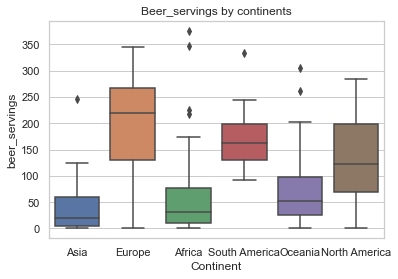

In [193]:
sns.set(style='whitegrid')
sns.boxplot(x='Continent', y = 'beer_servings', data = drink_continent_beer).set(title = 'Beer_servings by continents')

[Text(0.5, 1.0, 'Wine_servings vs Beer_servings')]

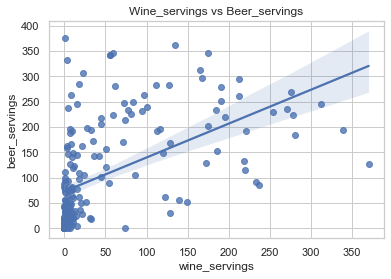

In [198]:
# If the number of wine servings is negatively or positively correlated with the number of beer servings.
sns.regplot(x = drink[['wine_servings']], y= drink[['beer_servings']]).set(title = 'Wine_servings vs Beer_servings')

In [199]:
drink.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


[Text(0.5, 1.0, 'correlation between different drink vs total consumption of alcohol')]

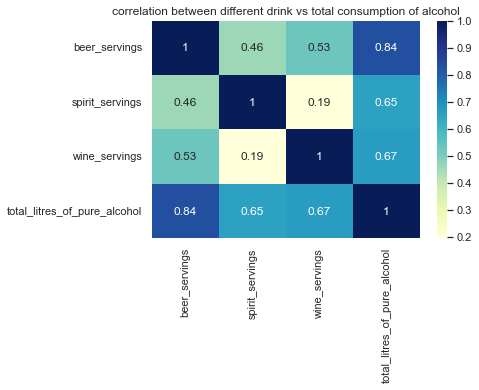

In [205]:
sns.heatmap(drink.corr(),cmap='YlGnBu',annot = True).set(title ="correlation between different drink vs total consumption of alcohol")

### Compare SLR and MLR models by R^2 and MSE

In [242]:
#Fit a linear regression model to predict
import sklearn
from sklearn.linear_model import LinearRegression

In [243]:
lm = LinearRegression()
lm

LinearRegression()

In [287]:
x = drink[['wine_servings']]
y = drink['total_litres_of_pure_alcohol']
lm.fit(x,y)

LinearRegression()

In [288]:
yhat_wine = lm.predict(x)
yhat_wine[0:5]

array([ 3.15407943,  4.86088833,  3.59658545, 13.01564196,  4.57642018])

In [289]:
lm.score(x,y)

0.4456875459787605

In [ ]:
from sklearn.metrics import mean_squared_error

In [290]:
mse = mean_squared_error(y,yhat_wine)
mse

7.851286122663144

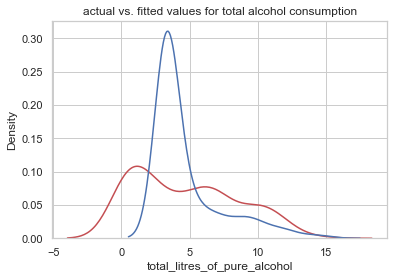

In [291]:
ax1 = sns.kdeplot(drink['total_litres_of_pure_alcohol'], color = 'r', label = 'acutal values')
sns.kdeplot(yhat_wine, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values for total alcohol consumption')
plt.show()

#### The linear regression model doesn't work 

In [292]:
x = drink[['beer_servings','spirit_servings','wine_servings']]
y = drink['total_litres_of_pure_alcohol']
lm.fit(x,y)

LinearRegression()

In [293]:
yhat = lm.predict(x)
yhat[0:5]

array([ 0.72244985,  5.26936613,  1.40409598, 12.34732018,  6.30123153])

In [294]:
lm.intercept_

0.7224498487088455

In [295]:
lm.coef_

array([0.01830291, 0.01555814, 0.01600524])

In [258]:
lm.score(x,y)

0.8741728224192638

In [297]:
mse = mean_squared_error(y,yhat)
mse

1.7822171701660017

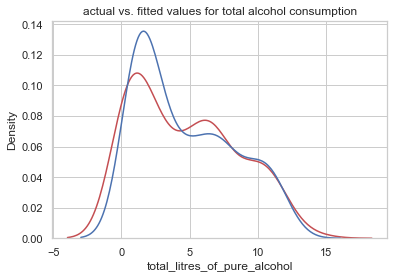

In [298]:
ax1 = sns.kdeplot(drink['total_litres_of_pure_alcohol'], color = 'r', label = 'acutal values')
sns.kdeplot(yhat, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values for total alcohol consumption')
plt.show()

#### This multiple linear regression model is overfitting 

In [264]:
# traing data 
x_data = drink[['beer_servings','spirit_servings','wine_servings']]
y_data = drink['total_litres_of_pure_alcohol']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 0)
print('number of test samples:', x_test.shape[0])
print('number of trating samples:',x_train.shape[0])

number of test samples: 20
number of trating samples: 173


In [265]:
lm_train = LinearRegression()

In [266]:
lm_train.fit(x_train,y_train)

LinearRegression()

In [268]:
lm_train.score(x_train,y_train)

0.8843621858666174

In [269]:
lm_train.score(x_test,y_test)

0.6990304512837944

## Create pipeline

In [271]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [272]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [274]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [278]:
z =  drink[['beer_servings','spirit_servings','wine_servings']]
Z = z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [279]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([ 0.66771682,  5.02238617,  1.58272774, 12.65988765])

In [280]:
Input=[('scale',StandardScaler()), ('model',LinearRegression())]
pipe = Pipeline(Input)

In [281]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [282]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([ 0.72244985,  5.26936613,  1.40409598, 12.34732018])

### Refine the model

#### Use polynomial transformation to test the data

In [336]:
from sklearn. preprocessing import PolynomialFeatures

In [337]:
lre = LinearRegression()

In [338]:
x_data = drink[['beer_servings','spirit_servings','wine_servings']]
y_data = drink['total_litres_of_pure_alcohol']
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 0)
print('number of test samples:', x_test.shape[0])
print('number of trating samples:',x_train.shape[0])

number of test samples: 20
number of trating samples: 173


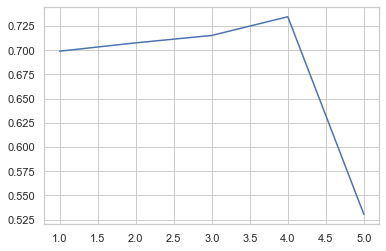

In [341]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lre.fit(x_train_pr,y_train)
    Rsqu_test.append(lre.score(x_test_pr,y_test))
    
plt.plot(order,Rsqu_test)
plt.show()

**R^2 drops drastically after degree = 4**

In [342]:
pr_2 = PolynomialFeatures(degree = 2)
x_train_pr2 = pr_2.fit_transform(x_train)
x_test_pr2 = pr_2.fit_transform(x_test)
pr_2

PolynomialFeatures()

In [343]:
poly_2 = LinearRegression()
poly_2.fit(x_train_pr2,y_train)

LinearRegression()

In [344]:
poly_2.score(x_train_pr2,y_train)

0.8981586745966471

In [345]:
pr_4 = PolynomialFeatures(degree = 5)
x_train_pr4 = pr_4.fit_transform(x_train)
x_test_pr4 = pr_4.fit_transform(x_test)
pr_4

PolynomialFeatures(degree=5)

In [346]:
poly_4 = LinearRegression()
poly_4.fit(x_train_pr4,y_train)
poly_4.score(x_train_pr4,y_train)

0.9295005008015532

In [353]:
yhat_poly4 = poly_4.predict(x_train_pr4)
yhat_poly4[0:4]

array([1.68792435, 0.43616722, 0.11436954, 2.17794693])

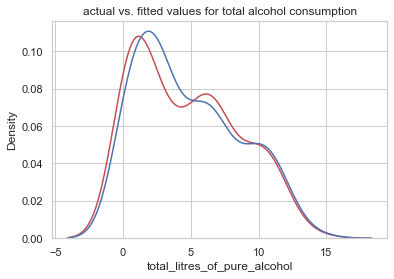

In [354]:
ax1 = sns.kdeplot(y_data, color = 'r', label = 'acutal values')
sns.kdeplot(yhat_poly4, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values for total alcohol consumption')
plt.show()

In [355]:
yhat_poly4_2 = poly_4.predict(x_test_pr4)
yhat_poly4_2[0:4]

array([0.11436954, 4.57384968, 8.56254565, 0.33460464])

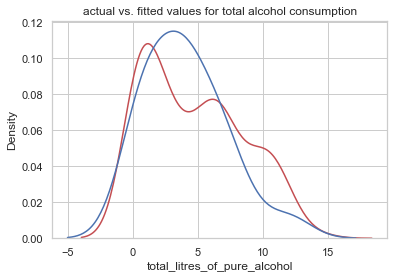

In [356]:
ax1 = sns.kdeplot(y_data, color = 'r', label = 'acutal values')
sns.kdeplot(yhat_poly4_2, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values for total alcohol consumption')
plt.show()

**degree = 4 overfitting**

In [350]:
poly_4.score(x_test_pr4,y_test)

0.5304477671496812

In [351]:
poly_2.score(x_test_pr2,y_test)

0.7076376133886052

In [357]:
yhat_poly2 = poly_2.predict(x_train_pr2)
yhat_poly4[0:4]

array([1.68792435, 0.43616722, 0.11436954, 2.17794693])

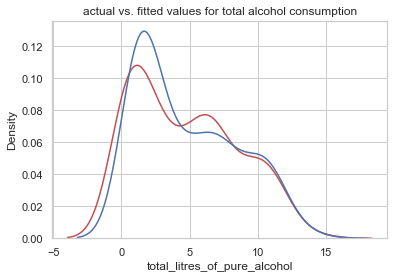

In [358]:
ax1 = sns.kdeplot(y_data, color = 'r', label = 'acutal values')
sns.kdeplot(yhat_poly2, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values for total alcohol consumption')
plt.show()

In [359]:
yhat_poly2_2 = poly_2.predict(x_test_pr2)
yhat_poly2_2[0:4]

array([0.67483964, 4.4123025 , 8.54359816, 0.7845907 ])

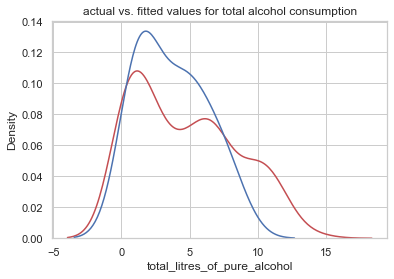

In [360]:
ax1 = sns.kdeplot(y_data, color = 'r', label = 'acutal values')
sns.kdeplot(yhat_poly2_2, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values for total alcohol consumption')
plt.show()

**Both Polynomial regression seems overfitting, expecailly when degree = 4**

### Ridge regression

In [361]:
from sklearn.linear_model import Ridge

In [362]:
RigeModel = Ridge(alpha = 1)

In [363]:
RigeModel.fit(x_train_pr2,y_train)

Ridge(alpha=1)

In [364]:
RigeModel.score(x_test_pr2,y_test)

0.7076377075908595

In [366]:
yhat_new = RigeModel.predict(x_test_pr2)
yhat_new[0:4]

array([0.67484765, 4.41230526, 8.54358889, 0.78459798])

In [369]:
print('predicted: ',yhat_new[0:4])
print('actual: ',y_test[0:4].values)

predicted:  [0.67484765 4.41230526 8.54358889 0.78459798]
actual:  [0.  4.6 8.2 0.1]


In [370]:
from tqdm import tqdm

In [381]:
Rsqu_test = []
Rsqu_train = []
dummy_1 = []
Alpha = 10 * np.array(range(0,10000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha = 1)
    RigeModel.fit(x_train_pr2,y_train)
    test_score, train_score = RigeModel.score(x_test_pr2,y_test), RigeModel.score(x_train_pr2,y_train)
    pbar.set_postfix({'Test score': test_score, 'Train score' : train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████████████████████████████████| 10000/10000 [01:13<00:00, 135.41it/s, Test score=0.708, Train score=0.898]


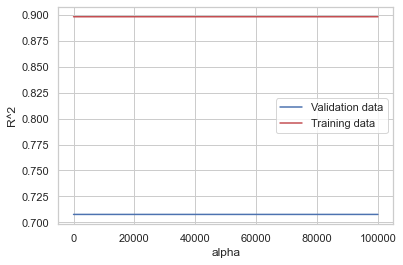

In [382]:
plt.plot(Alpha, Rsqu_test,label = 'Validation data')
plt.plot(Alpha,Rsqu_train,'r',label='Training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

**The change of alpha has no effect on R^2**

### Conclusion: The best-fit model is Polynomial regression model with degree of 2 